In [ ]:
!wget https://www.dropbox.com/scl/fi/vv2w9v890lgd2h9kovv7r/glove.6B.50d1.txt?rlkey=rxrdka5i47xxfnszawwuub2r8&dl=0

--2024-11-03 19:56:40--  https://www.dropbox.com/scl/fi/vv2w9v890lgd2h9kovv7r/glove.6B.50d1.txt?rlkey=rxrdka5i47xxfnszawwuub2r8
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://ucbdb74de7deae4c1656fe3de898.dl.dropboxusercontent.com/cd/0/inline/CducKpOuQblXyaatome761GvuzHf-ez2wkzmPQms1KfObhy6aexSypzvg5Il1Ej6UmNEZVBSipCupP6GC4H5uybx9_eHP6zOiXXyb2kw_KTJGnopAY-obhlr1sJzYhgL2aqBlrzC1EpsAqJTzv35TbR1/file# [following]
--2024-11-03 19:56:41--  https://ucbdb74de7deae4c1656fe3de898.dl.dropboxusercontent.com/cd/0/inline/CducKpOuQblXyaatome761GvuzHf-ez2wkzmPQms1KfObhy6aexSypzvg5Il1Ej6UmNEZVBSipCupP6GC4H5uybx9_eHP6zOiXXyb2kw_KTJGnopAY-obhlr1sJzYhgL2aqBlrzC1EpsAqJTzv35TbR1/file
Resolving ucbdb74de7deae4c1656fe3de898.dl.dropboxusercontent.com (ucbdb74de7deae4c1656fe3de898.dl.dropboxusercontent.com)... 162.125.5.15, 2

In [ ]:
!pip install Keras-Preprocessing

In [ ]:
!wget https://www.dropbox.com/scl/fo/u6cxdy4afbot71qlx1htf/h?rlkey=qra18nhi1jpk2m7r0vv1umr9s&dl=0

--2024-11-03 19:56:47--  https://www.dropbox.com/scl/fo/u6cxdy4afbot71qlx1htf/h?rlkey=qra18nhi1jpk2m7r0vv1umr9s
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://uc106cea8a0ff943dda1c80ffa6b.dl.dropboxusercontent.com/zip_download_get/CBFPK7Qpa9SwBzqRYusvhgzzrZ6z3_a-qVDNQrXYnjtJeX_pSg9h8UJL3NsAQK5WVfLDQhFWkxBfUAENUQCeKNwJ3c_wA8PHWoAAAzCcjiWynQ# [following]
--2024-11-03 19:56:51--  https://uc106cea8a0ff943dda1c80ffa6b.dl.dropboxusercontent.com/zip_download_get/CBFPK7Qpa9SwBzqRYusvhgzzrZ6z3_a-qVDNQrXYnjtJeX_pSg9h8UJL3NsAQK5WVfLDQhFWkxBfUAENUQCeKNwJ3c_wA8PHWoAAAzCcjiWynQ
Resolving uc106cea8a0ff943dda1c80ffa6b.dl.dropboxusercontent.com (uc106cea8a0ff943dda1c80ffa6b.dl.dropboxusercontent.com)... 162.125.5.15, 2620:100:601d:15::a27d:50f
Connecting to uc106cea8a0ff943dda1c80ffa6b.dl.dropboxusercontent.com (uc10

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!unzip h?rlkey=qra18nhi1jpk2m7r0vv1umr9s

Streaming output truncated to the last 5000 lines.
 extracting: Flickr_Data/Flickr_Data/Images/3435015880_eda46ff50f.jpg  
 extracting: Flickr_Data/Flickr_Data/Images/3475005101_6f6e437459.jpg  
 extracting: Flickr_Data/Flickr_Data/Images/3479050296_65bcea69a0.jpg  
 extracting: Flickr_Data/Flickr_Data/Images/3486538055_bcf4d3dfda.jpg  
 extracting: Flickr_Data/Flickr_Data/Images/3494105596_f05cb0d56f.jpg  
 extracting: Flickr_Data/Flickr_Data/Images/3500136982_bf7a85531e.jpg  
 extracting: Flickr_Data/Flickr_Data/Images/3521201948_9049197f20.jpg  
 extracting: Flickr_Data/Flickr_Data/Images/3529211822_1dabdb3a9c.jpg  
 extracting: Flickr_Data/Flickr_Data/Images/3532205154_5674b628ea.jpg  
 extracting: Flickr_Data/Flickr_Data/Images/3532587748_7e64bb223a.jpg  
 extracting: Flickr_Data/Flickr_Data/Images/3540598210_972f0ff573.jpg  
 extracting: Flickr_Data/Flickr_Data/Images/3547000169_40191e02ca.jpg  
 extracting: Flickr_Data/Flickr_Data/Images/3549011001_26cace3646.jpg  
 extracting: 

In [ ]:
####IMPORTS###
import numpy as np
import tensorflow.keras as keras
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import os
import collections
import tensorflow_hub as hub
from tensorflow.keras.applications.resnet50 import ResNet50
from keras.applications.resnet50 import preprocess_input
from tensorflow.keras.utils import plot_model
from keras.layers import Add
from keras.preprocessing import image
import nltk
from nltk.corpus import stopwords
from tensorflow.keras.utils import pad_sequences
import pickle
from keras.models import Model, load_model
from keras.layers import Input,Dense, Dropout, Embedding, GRU
from keras.utils import to_categorical

In [ ]:
def read_text(path):
  with open(path,'r') as f:
    captions = f.read()
  return captions

def clean_text(sentence):
  sentence = sentence.lower()
  sentence = re.sub("[^a-z]+"," ",sentence)
  sentence = sentence.split()

  sentence = [s for s in sentence if len(s)>1]
  sentence = " ".join(sentence)
  return sentence

def get_Cleaned_Descriptions(captions):
  descriptions = {}

  for caption in captions:
    id,cap = caption.split('\t')
    id = id[:-2]
    if descriptions.get(id) is None:
      descriptions[id] = []
    descriptions[id].append(cap)
  for key,caption_list in descriptions.items():
    for i in range(len(caption_list)):
      caption_list[i] = clean_text(caption_list[i])
  return descriptions

def get_Vocabulary(descriptions):
  vocab = set()
  for key in descriptions.keys():
    [vocab.update(sentence.split()) for sentence in descriptions[key]]
  return vocab

def get_TotalWords(descriptions):
  total_words = []
  for key in descriptions.keys():
    [total_words.append(i) for sentence in descriptions[key] for i in sentence.split()]
  counter = collections.Counter(total_words)
  freq_counter = dict(counter)
  sorted_freq_counts = sorted(freq_counter.items(),reverse = True, key = lambda x:x[1])
  threshold = 10
  sorted_freq_counts = [x for x in sorted_freq_counts if x[1]>threshold]
  total_words =[x[0] for x in sorted_freq_counts]
  return total_words,sorted_freq_counts;

def add_StartEndTokens(descriptions, data):
  train_desc = {}

  for _id in data:
    if _id in descriptions:
      train_desc[_id] = []
      for cap in descriptions[_id]:
        cap_to_add = "startseq "+cap+ " endseq"
        train_desc[_id].append(cap_to_add)
    else:
      print(f"Missing description for image ID: {_id}")
  return train_desc

def get_word_to_idx(total_words):
  word_to_idx = {}
  idx_to_word = {}
  for i,word in enumerate(total_words):
    word_to_idx[word] = i+1
    idx_to_word[i+1] = word
  print(len(word_to_idx))
  word_to_idx['startseq'] = 1846
  word_to_idx['endseq'] = 1847
  idx_to_word[1846] = 'startseq'
  idx_to_word[1847] = 'endseq'
  vocab_size = len(word_to_idx)+1
  return word_to_idx,idx_to_word,vocab_size


import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

def data_generator(train_desc, train_encoded, word_to_idx, batch_size, maxlength=35):
    x1, x2, y = [], [], []
    n = 0
    while True:
        for key, caps in train_desc.items():
            photo = train_encoded[key]
            if photo.shape != (2048,):
                photo = np.reshape(photo, (2048,))
            for cap in caps:
                seq = [word_to_idx[word] for word in cap.split() if word in word_to_idx]
                for i in range(1, len(seq)):
                    xi = seq[0:i]
                    yi = seq[i]
                    xi = pad_sequences([xi], maxlen=maxlength, value=0, padding='post')[0]
                    yi = to_categorical([yi], num_classes=vocab_size)[0]
                    x1.append(photo)  # Image features
                    x2.append(xi)     # Text input sequence
                    y.append(yi)      # Target word (one-hot encoded)

            n += 1
            if n == batch_size:
                yield (np.array(x1), np.array(x2)), np.array(y)
                x1, x2, y = [], [], []
                n = 0

# Wrap generator in a tf.data.Dataset
def create_dataset(train_desc, train_encoded, word_to_idx, batch_size, maxlength=35):
    dataset = tf.data.Dataset.from_generator(
        lambda: data_generator(train_desc, train_encoded, word_to_idx, batch_size, maxlength),
        output_signature=(
            (tf.TensorSpec(shape=(None, train_encoded[next(iter(train_encoded))].shape[0]), dtype=tf.float32),
             tf.TensorSpec(shape=(None, maxlength), dtype=tf.float32)),
            tf.TensorSpec(shape=(None, vocab_size), dtype=tf.float32)
        )
    )
    return dataset

def train():
    loss = []
    dataset = create_dataset(train_desc, train_encoded, word_to_idx, batch_size, maxlength=35)

    for i in range(epochs):
        history = model.fit(dataset, epochs=1, steps_per_epoch=steps_per_epoch, verbose=1)
        loss.append(history.history['loss'][0])

        if (i+1) % 10 == 0:
            model.save('/content/drive/MyDrive/model_weight_Inception+GRU_LATE_model_' + str(i+1) + '.h5')
    dict_loss = {'loss_inception+gru+early': loss}
    df = pd.DataFrame(dict_loss)
    df.to_csv('/content/drive/MyDrive/loss_late.csv')
    plt.plot(loss)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training Loss')
    plt.show()

# Embeddings will be added into the fusion model
def get_embedding_idx(glove_file):
  embedding_idx = {}

  for line in glove_file:
    values = line.split()
    word = values[0]
    word_embeddings = np.array(values[1:],dtype = 'float')
    embedding_idx[word] = word_embeddings
  return embedding_idx

def get_embedding_matrix(vocab_size,embedding_idx):
  embed_dim = 50
  matrix = np.zeros((vocab_size,embed_dim))
  for word,idx in word_to_idx.items():
    embed_vec = embedding_idx.get(word)
    if embed_vec is not None:
      matrix[idx] = embed_vec
  return matrix


In [ ]:
path = "/content/Flickr_Data/Flickr_Data/Flickr_TextData/Flickr8k.token.txt"
captions = read_text(path)

In [ ]:
captions = captions.split('\n')
captions = captions[:-1]
print(len(captions))

40460


In [ ]:
train_path = "/content/Flickr_Data/Flickr_Data/Flickr_TextData/Flickr_8k.trainImages.txt"
test_path = "/content/Flickr_Data/Flickr_Data/Flickr_TextData/Flickr_8k.testImages.txt"

In [ ]:
train_data = read_text(train_path)
test_data = read_text(test_path)
train_data = train_data.split('\n')
test_data = test_data.split('\n')
train_data = train_data[:-1]
test_data = test_data[:-1]

In [ ]:
descriptions = get_Cleaned_Descriptions(captions)
vocabulary = get_Vocabulary(descriptions)
total_words,sorted_freq_counts = get_TotalWords(descriptions)
add_StartEndTokens(descriptions,train_data)
add_StartEndTokens(descriptions,test_data)
word_to_idx,idx_to_word,vocab_size = get_word_to_idx(total_words)

1845


In [ ]:
print(descriptions['2513260012_03d33305cf.jpg'])
print(len(vocabulary))
print(len(total_words))
print(len(word_to_idx))
print(len(idx_to_word))
print(vocab_size)

['black dog is running after white dog in the snow', 'black dog chasing brown dog through snow', 'two dogs chase each other across the snowy ground', 'two dogs play together in the snow', 'two dogs running through low lying body of water']
8424
1845
1847
1847
1848


In [ ]:
with open('/content/drive/MyDrive/Images_Encoded/encoded_training_features_inception.pkl', 'rb') as file:
    train_encoded = pickle.load(file)

In [ ]:
print(train_encoded['2513260012_03d33305cf.jpg'].shape)

(2048,)


In [ ]:
glove_file = open("/content/glove.6B.50d1.txt?rlkey=rxrdka5i47xxfnszawwuub2r8")
embedding_idx = get_embedding_idx(glove_file)
embedding_matrix = get_embedding_matrix(vocab_size,embedding_idx)
glove_file.close()

In [ ]:
train_desc = add_StartEndTokens(descriptions,train_data)
test_desc = add_StartEndTokens(descriptions,test_data)

In [ ]:
print(len(train_desc))
print(len(test_desc))

6000
1000


In [ ]:
print(embedding_matrix.shape)

(1848, 50)


In [ ]:
from tensorflow.keras.layers import Input, Dropout, Dense, Embedding, GRU, Add, Bidirectional, BatchNormalization
from tensorflow.keras.models import Model

# Image Model
input_img_features = Input(shape=(2048,))
inp1 = Dropout(0.3)(input_img_features)
inp2 = Dense(1024, activation='relu')(inp1)
inp2 = BatchNormalization()(inp2)
inp3 = Dense(512, activation='relu')(inp2)
inp3 = BatchNormalization()(inp3)
inp4 = Dense(256, activation='relu')(inp3)
inp4 = BatchNormalization()(inp4)
inp4 = Dropout(0.3)(inp4)

# Text Model Input
inp_cap = Input(shape=(35,))
# Removed mask_zero=True
inp_c1 = Embedding(input_dim=1848, output_dim=50,mask_zero = True)(inp_cap)  # Embedding layer without mask_zero
inp_c2 = Dropout(0.3)(inp_c1)
inp_c3 = Bidirectional(GRU(512, return_sequences=True))(inp_c2)
inp_c4 = GRU(512)(inp_c3)
inp_c5 = Dense(256, activation='relu')(inp_c4)
inp_c5 = BatchNormalization()(inp_c5)
inp_c6 = Dense(256, activation='relu')(inp_c5)
inp_c6 = BatchNormalization()(inp_c6)

# Decoder and Final Layers
decoder1 = Add()([inp4, inp_c6])
decoder2 = Dense(512, activation='relu')(decoder1)
decoder2 = Dropout(0.5)(decoder2)
outputs = Dense(1848, activation='softmax')(decoder2)

# Define and Compile the Model
model = Model(inputs=[input_img_features, inp_cap], outputs=outputs)
model.compile(loss='categorical_crossentropy', optimizer='adam')

# Model Summary
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, 2048)           │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_3             │ (None, 35)             │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_4 (Dropout)       │ (None, 2048)           │              0 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_1 (Embedding)   │ (None, 35, 50)         │         92,400 │ input_layer_3[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_7 (Dense)           │ (None, 1024)           │      2,098,176 │ dropout_4[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_6 (Dropout)       │ (None, 35, 50)         │              0 │ embedding_1[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ not_equal_1 (NotEqual)    │ (None, 35)             │              0 │ input_layer_3[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_5     │ (None, 1024)           │          4,096 │ dense_7[0][0]          │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bidirectional_1           │ (None, 35, 1024)       │      1,732,608 │ dropout_6[0][0],       │
│ (Bidirectional)           │                        │                │ not_equal_1[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_8 (Dense)           │ (None, 512)            │        524,800 │ batch_normalization_5… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ gru_1 (GRU)               │ (None, 512)            │      2,362,368 │ bidirectional_1[0][0], │
│                           │                        │                │ not_equal_1[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_6     │ (None, 512)            │          2,048 │ dense_8[0][0]          │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_10 (Dense)          │ (None, 256)            │        131,328 │ gru_1[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_9 (Dense)           │ (None, 256)            │        131,328 │ batch_normalization_6… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_8     │ (None, 256)            │          1,024 │ dense_10[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_7     │ (None, 256)            │          1,024 │ dense_9[0][0]          │
│ (BatchNormalization) 

 Total params: 8,227,624 (31.39 MB)

 Trainable params: 8,223,016 (31.37 MB)

 Non-trainable params: 4,608 (18.00 KB)

In [ ]:
embedding_layer = model.get_layer('embedding_1')
embedding_layer.set_weights([embedding_matrix])# Updating the words to their corresponding embedding for glove
model.layers[2].trainable = False

model.compile(loss = 'categorical_crossentropy',optimizer = 'adam')

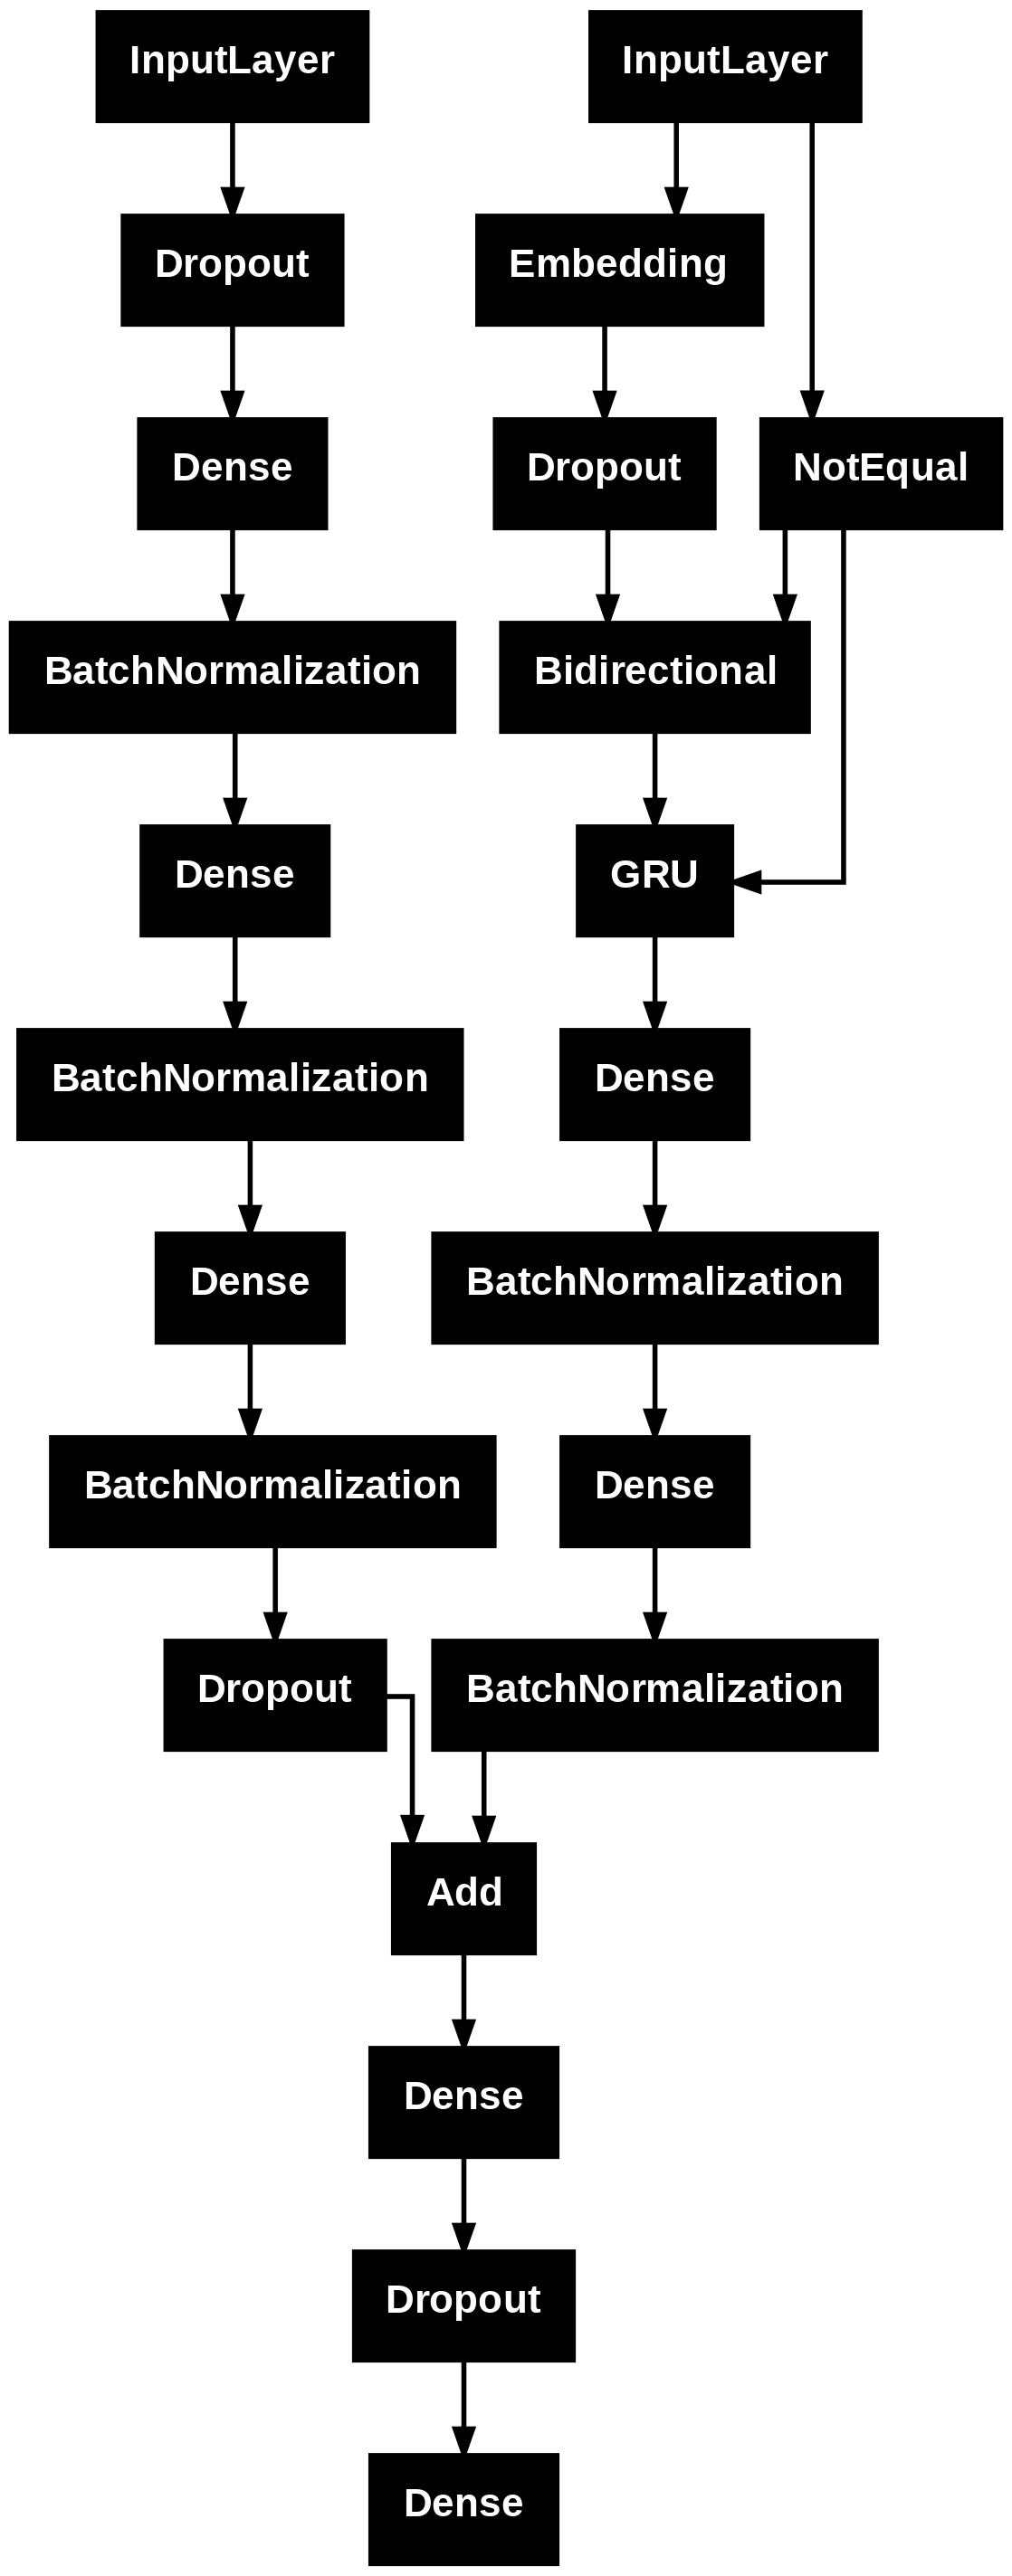

In [ ]:
plot_model(model)

In [ ]:
epochs = 50
batch_size = 32
steps_per_epoch = len(train_desc) // batch_size

In [ ]:
generator = data_generator(train_desc,train_encoded,word_to_idx,batch_size,maxlength = 35)
x, y = next(generator)
print(x)
print(y)

(array([[2.5600743e-01, 7.0309410e+00, 6.1963634e+00, ..., 0.0000000e+00,
        1.3576490e+01, 3.3275280e+00],
       [2.5600743e-01, 7.0309410e+00, 6.1963634e+00, ..., 0.0000000e+00,
        1.3576490e+01, 3.3275280e+00],
       [2.5600743e-01, 7.0309410e+00, 6.1963634e+00, ..., 0.0000000e+00,
        1.3576490e+01, 3.3275280e+00],
       ...,
       [2.4294436e-03, 1.1466165e+00, 5.3717756e+00, ..., 3.0128247e-01,
        8.7001944e-01, 1.5664504e-01],
       [2.4294436e-03, 1.1466165e+00, 5.3717756e+00, ..., 3.0128247e-01,
        8.7001944e-01, 1.5664504e-01],
       [2.4294436e-03, 1.1466165e+00, 5.3717756e+00, ..., 3.0128247e-01,
        8.7001944e-01, 1.5664504e-01]], dtype=float32), array([[1846,    0,    0, ...,    0,    0,    0],
       [1846,   12,    0, ...,    0,    0,    0],
       [1846,   12,    6, ...,    0,    0,    0],
       ...,
       [1846,    6,   42, ...,    0,    0,    0],
       [1846,    6,   42, ...,    0,    0,    0],
       [1846,    6,   42, ...,    0,

In [ ]:
print(len(train_desc))
print(len(train_encoded))

6000
6000


In [ ]:
import tensorflow as tf

In [ ]:
tf.config.run_functions_eagerly(True)

/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


187/187 ━━━━━━━━━━━━━━━━━━━━ 119s 632ms/step - loss: 5.2647
187/187 ━━━━━━━━━━━━━━━━━━━━ 164s 879ms/step - loss: 4.1215
187/187 ━━━━━━━━━━━━━━━━━━━━ 118s 627ms/step - loss: 3.8351
187/187 ━━━━━━━━━━━━━━━━━━━━ 118s 629ms/step - loss: 3.6654
187/187 ━━━━━━━━━━━━━━━━━━━━ 116s 620ms/step - loss: 3.5503
187/187 ━━━━━━━━━━━━━━━━━━━━ 118s 627ms/step - loss: 3.4600
187/187 ━━━━━━━━━━━━━━━━━━━━ 118s 631ms/step - loss: 3.3847
187/187 ━━━━━━━━━━━━━━━━━━━━ 117s 626ms/step - loss: 3.3173
187/187 ━━━━━━━━━━━━━━━━━━━━ 117s 622ms/step - loss: 3.2601
187/187 ━━━━━━━━━━━━━━━━━━━━ 117s 624ms/step - loss: 3.2080


187/187 ━━━━━━━━━━━━━━━━━━━━ 117s 627ms/step - loss: 3.1527
187/187 ━━━━━━━━━━━━━━━━━━━━ 116s 620ms/step - loss: 3.1103
187/187 ━━━━━━━━━━━━━━━━━━━━ 118s 627ms/step - loss: 3.0675
187/187 ━━━━━━━━━━━━━━━━━━━━ 118s 630ms/step - loss: 3.0251
187/187 ━━━━━━━━━━━━━━━━━━━━ 116s 617ms/step - loss: 2.9869
187/187 ━━━━━━━━━━━━━━━━━━━━ 116s 619ms/step - loss: 2.9419
187/187 ━━━━━━━━━━━━━━━━━━━━ 116s 619ms/step - loss: 2.9053
187/187 ━━━━━━━━━━━━━━━━━━━━ 117s 625ms/step - loss: 2.8709
187/187 ━━━━━━━━━━━━━━━━━━━━ 116s 620ms/step - loss: 2.8329
187/187 ━━━━━━━━━━━━━━━━━━━━ 115s 615ms/step - loss: 2.7938


187/187 ━━━━━━━━━━━━━━━━━━━━ 117s 622ms/step - loss: 2.7612
187/187 ━━━━━━━━━━━━━━━━━━━━ 116s 620ms/step - loss: 2.7274
187/187 ━━━━━━━━━━━━━━━━━━━━ 117s 625ms/step - loss: 2.6956
187/187 ━━━━━━━━━━━━━━━━━━━━ 116s 619ms/step - loss: 2.6611
187/187 ━━━━━━━━━━━━━━━━━━━━ 116s 616ms/step - loss: 2.6359
187/187 ━━━━━━━━━━━━━━━━━━━━ 115s 616ms/step - loss: 2.6060
187/187 ━━━━━━━━━━━━━━━━━━━━ 116s 618ms/step - loss: 2.5780
187/187 ━━━━━━━━━━━━━━━━━━━━ 114s 611ms/step - loss: 2.5518
187/187 ━━━━━━━━━━━━━━━━━━━━ 116s 617ms/step - loss: 2.5249
187/187 ━━━━━━━━━━━━━━━━━━━━ 115s 615ms/step - loss: 2.4973


187/187 ━━━━━━━━━━━━━━━━━━━━ 111s 593ms/step - loss: 2.4763
187/187 ━━━━━━━━━━━━━━━━━━━━ 115s 612ms/step - loss: 2.4463
187/187 ━━━━━━━━━━━━━━━━━━━━ 115s 615ms/step - loss: 2.4248
187/187 ━━━━━━━━━━━━━━━━━━━━ 114s 610ms/step - loss: 2.4022
187/187 ━━━━━━━━━━━━━━━━━━━━ 116s 619ms/step - loss: 2.3810
187/187 ━━━━━━━━━━━━━━━━━━━━ 115s 614ms/step - loss: 2.3557
187/187 ━━━━━━━━━━━━━━━━━━━━ 114s 610ms/step - loss: 2.3383
187/187 ━━━━━━━━━━━━━━━━━━━━ 115s 616ms/step - loss: 2.3169
187/187 ━━━━━━━━━━━━━━━━━━━━ 106s 565ms/step - loss: 2.2960
187/187 ━━━━━━━━━━━━━━━━━━━━ 87s 465ms/step - loss: 2.2807


187/187 ━━━━━━━━━━━━━━━━━━━━ 89s 476ms/step - loss: 2.2557
187/187 ━━━━━━━━━━━━━━━━━━━━ 89s 478ms/step - loss: 2.2417
187/187 ━━━━━━━━━━━━━━━━━━━━ 89s 475ms/step - loss: 2.2244
187/187 ━━━━━━━━━━━━━━━━━━━━ 90s 478ms/step - loss: 2.2080
187/187 ━━━━━━━━━━━━━━━━━━━━ 115s 613ms/step - loss: 2.1937
187/187 ━━━━━━━━━━━━━━━━━━━━ 115s 613ms/step - loss: 2.1737
187/187 ━━━━━━━━━━━━━━━━━━━━ 115s 617ms/step - loss: 2.1597
187/187 ━━━━━━━━━━━━━━━━━━━━ 116s 617ms/step - loss: 2.1439
187/187 ━━━━━━━━━━━━━━━━━━━━ 115s 611ms/step - loss: 2.1332
187/187 ━━━━━━━━━━━━━━━━━━━━ 115s 616ms/step - loss: 2.1149


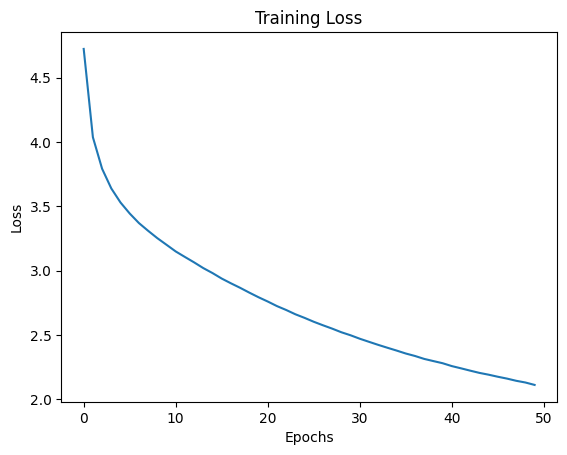

In [ ]:
train()

In [ ]:
with open('/content/drive/MyDrive/Images_Encoded/encoded_testing_features_inception.pkl', 'rb') as file:
    test_encoded = pickle.load(file)

In [ ]:
def predict(photo):
  in_text = "startseq"
  for i in range(35):
    sequence = [word_to_idx[w] for w in in_text.split() if w in word_to_idx]
    sequence = pad_sequences([sequence],maxlen = 35, padding = 'post')

    y_pred = model.predict([photo,sequence])
    y_pred = y_pred.argmax()

    word = idx_to_word[y_pred]

    in_text += (" "+ word)
    if (word == "endseq"):
      break
  final_cap = in_text.split()
  caption_req = final_cap[1:-1]
  caption_req = " ".join(caption_req)
  return caption_req

In [ ]:
ori_img_path = "Flickr_Data/Flickr_Data/Images/"

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


Text(0.5, 1.0, 'man and woman are sitting on bench in front of an building')

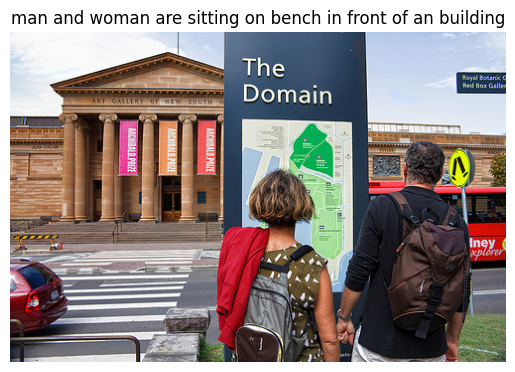

In [ ]:
idx = np.random.randint(0,1000)
all_img_names = list(test_encoded.keys())
img = all_img_names[idx]
photo_2048 = test_encoded[img].reshape((1,2048))
im = plt.imread(ori_img_path+ img)
cap = predict(photo_2048)
plt.imshow(im)
plt.axis("off")
plt.title(cap)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


Text(0.5, 1.0, 'the little girl is wearing red shirt and holding stuffed animal')

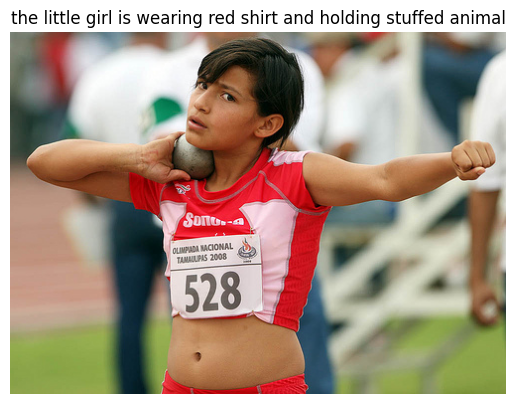

In [ ]:
idx = np.random.randint(0,1000)
all_img_names = list(test_encoded.keys())
img = all_img_names[idx]
photo_2048 = test_encoded[img].reshape((1,2048))
im = plt.imread(ori_img_path+ img)
cap = predict(photo_2048)
plt.imshow(im)
plt.axis("off")
plt.title(cap)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


Text(0.5, 1.0, 'man in red shirt is standing in front of large rock formation')

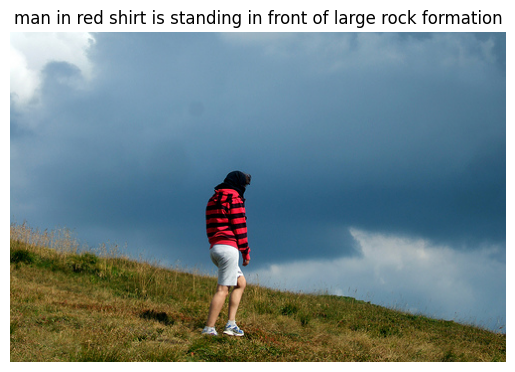

In [ ]:
idx = np.random.randint(0,1000)
all_img_names = list(test_encoded.keys())
img = all_img_names[idx]
photo_2048 = test_encoded[img].reshape((1,2048))
im = plt.imread(ori_img_path+ img)
cap = predict(photo_2048)
plt.imshow(im)
plt.axis("off")
plt.title(cap)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


Text(0.5, 1.0, 'young girl wearing pink hat eats on the floor')

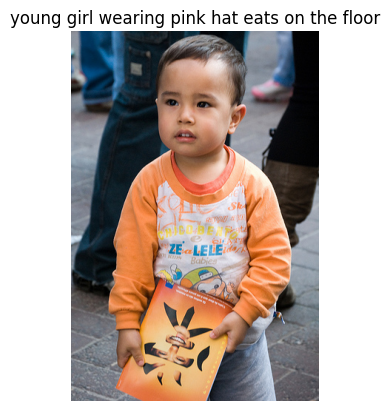

In [ ]:
idx = np.random.randint(0,1000)
all_img_names = list(test_encoded.keys())
img = all_img_names[idx]
photo_2048 = test_encoded[img].reshape((1,2048))
im = plt.imread(ori_img_path+ img)
cap = predict(photo_2048)
plt.imshow(im)
plt.axis("off")
plt.title(cap)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


Text(0.5, 1.0, 'two girls are sitting on couch and smile')

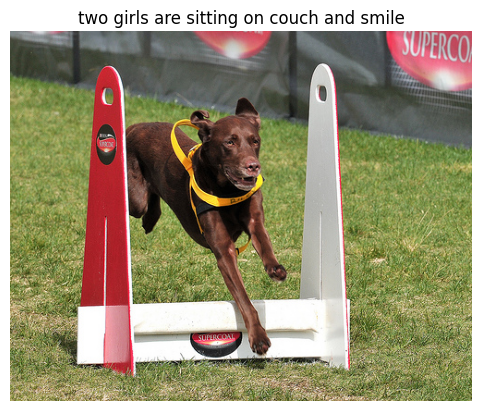

In [ ]:
idx = np.random.randint(0,1000)
all_img_names = list(test_encoded.keys())
img = all_img_names[idx]
photo_2048 = test_encoded[img].reshape((1,2048))
im = plt.imread(ori_img_path+ img)
cap = predict(photo_2048)
plt.imshow(im)
plt.axis("off")
plt.title(cap)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


Text(0.5, 1.0, 'man in black shirt and cast smokes cigarette')

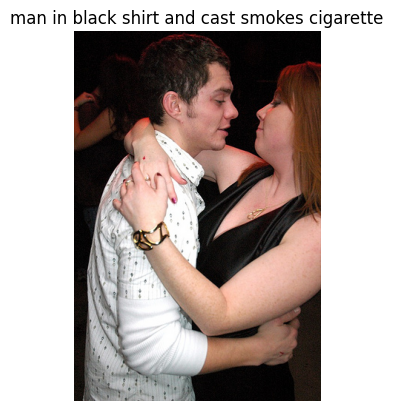

In [ ]:
idx = np.random.randint(0,1000)
all_img_names = list(test_encoded.keys())
img = all_img_names[idx]
photo_2048 = test_encoded[img].reshape((1,2048))
im = plt.imread(ori_img_path+ img)
cap = predict(photo_2048)
plt.imshow(im)
plt.axis("off")
plt.title(cap)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


Text(0.5, 1.0, 'man in black shirt and jeans is holding stick')

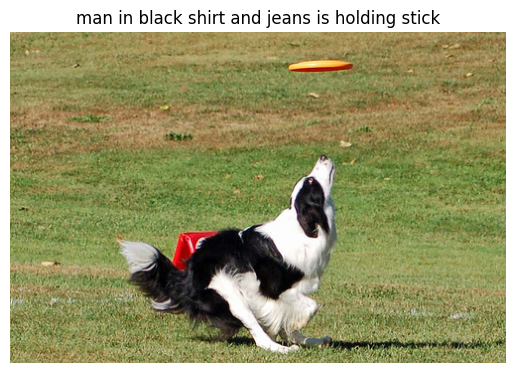

In [ ]:
idx = np.random.randint(0,1000)
all_img_names = list(test_encoded.keys())
img = all_img_names[idx]
photo_2048 = test_encoded[img].reshape((1,2048))
im = plt.imread(ori_img_path+ img)
cap = predict(photo_2048)
plt.imshow(im)
plt.axis("off")
plt.title(cap)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Text(0.5, 1.0, 'the woman is wearing purple shirt and white skirt while sitting on the lap of horse')

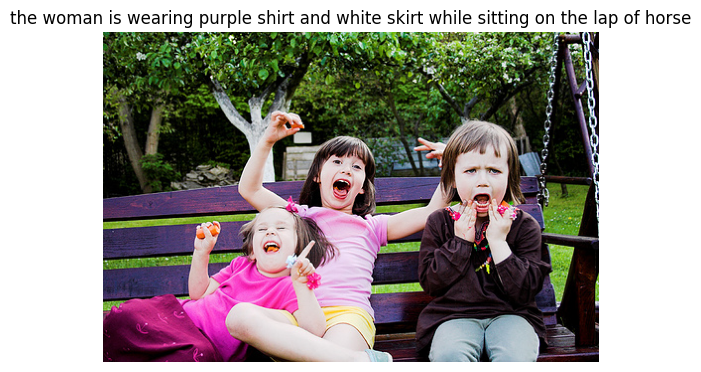

In [ ]:
idx = np.random.randint(0,1000)
all_img_names = list(test_encoded.keys())
img = all_img_names[idx]
photo_2048 = test_encoded[img].reshape((1,2048))
im = plt.imread(ori_img_path+ img)
cap = predict(photo_2048)
plt.imshow(im)
plt.axis("off")
plt.title(cap)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


Text(0.5, 1.0, 'dog is jumping over hurdle')

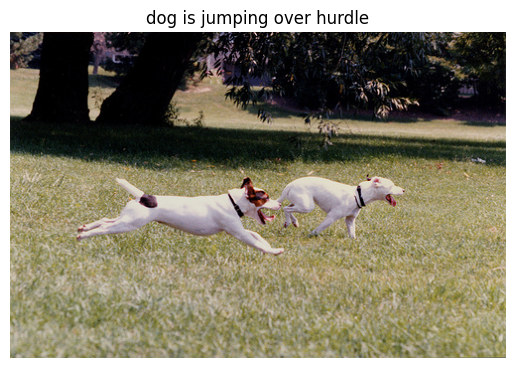

In [ ]:
idx = np.random.randint(0,1000)
all_img_names = list(test_encoded.keys())
img = all_img_names[idx]
photo_2048 = test_encoded[img].reshape((1,2048))
im = plt.imread(ori_img_path+ img)
cap = predict(photo_2048)
plt.imshow(im)
plt.axis("off")
plt.title(cap)